# Modelo de Regressão Linear Múltipla

## Análise dos Dados

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df_19 = pd.read_csv("..\\dados\\2019.csv")
df_19.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df_19["Year"] = 2019
df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [5]:
target = ["Top", "Top-Mid", "Low-Mid", "Low"]
target_n = [4, 3, 2, 1]

df_19["target"] = pd.qcut(df_19["Overall rank"], len(target), labels=target)
df_19["target_n"] = pd.qcut(df_19["Overall rank"], len(target_n), labels=target_n)

df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,target,target_n
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Top,4
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Top,4
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Top,4
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Top,4
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Top,4


In [6]:
finaldf = df_19
finaldf.dropna(inplace=True)

In [7]:
finaldf.isnull().any()

Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
Year                            False
target                          False
target_n                        False
dtype: bool

In [8]:
finaldf.columns = [
    "Rank", "Country", "Score", "GDP", "Support", "Health",
    "Freedom", "Generosity", "Corruption", "Year", "target", "target_n"
]
finaldf.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Top,4
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Top,4
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Top,4
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Top,4
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Top,4


In [9]:
finaldf.Corruption.fillna((finaldf.Corruption.mean()), inplace=True)
finaldf.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Top,4
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Top,4
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Top,4
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Top,4
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Top,4


In [10]:
evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

## Definir uma função para calcular o R-quadrado ajustado

^R² = R² - (n - 1) * (1 - R²) / (n - k - 1)

In [11]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

## Definir o modelo de Regressão Linear Múltipla

In [12]:
train_data, test_data = train_test_split(finaldf, train_size=0.8, random_state=3)

independent_var = ["GDP", "Support", "Health", "Freedom", "Generosity", "Corruption"]
lin_reg = LinearRegression()
lin_reg.fit(train_data[independent_var], train_data["Score"])

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 1.8392422407690079
Coefficients: [0.76539426 1.10295366 1.01929667 1.57742356 0.26413816 0.83081881]


In [13]:
pred = lin_reg.predict(test_data[independent_var])

In [14]:
rmse = metrics.mean_squared_error(test_data["Score"], pred)
r2_train = lin_reg.score(train_data[independent_var], train_data["Score"])
ar2_train = adjusted_r2(
    r2_train,
    train_data.shape[0],
    len(independent_var)
)

r2_test = lin_reg.score(test_data[independent_var], test_data["Score"])
ar2_test = adjusted_r2(
    r2_test,
    test_data.shape[0],
    len(independent_var)
)

cross_val = cross_val_score(lin_reg, finaldf[independent_var], finaldf["Score"], cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Linear Regression-1,Selected features,0.233369,0.758398,0.504407,0.832271,0.624287,-5.801002


## Analisar a correlação entre variáveis independentes

In [15]:
# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(finaldf.corr(), dtype=np.bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

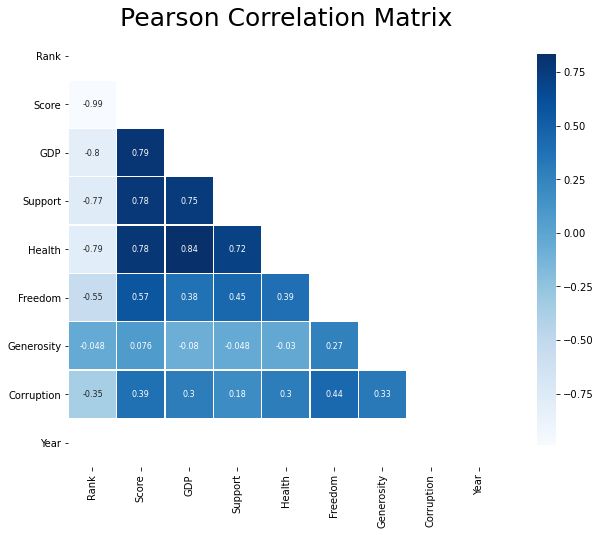

In [18]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    finaldf.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)